In [103]:
import numpy as np
import random
import math

mB = 5280 #MeV
mD = 1865 #MeV
mp = 140 #MeV
mK = 494 #Mev
tauB = 1.6e-12 #s
tauD = 0.4e-12 #s
pB = 2000 #MeV

K = []
xB = []
delta_x = []

samples = 1e4

c = 299792458 #m/s #serve solo per le distanze, così sono calcolate in metri

def energy(px,py,pz,m):
    return np.sqrt(px**2 + py**2 + pz**2 + m**2)


def boost_x(E,px,py,pz,gamma,beta):
    En = gamma*E + beta*gamma*px
    pxn = beta*gamma*E + gamma*px
    return En, pxn, py, pz

def two_body_decay(M,px,py,pz,m1,m2,theta,phi):
    p = np.sqrt(M**4 + m1**4 + m2**4 -2*(M**2) * (m1**2) - 2*(M**2) * (m2**2) - 2*(m1**2) * (m2**2) )/(2 * M)
    p1x = p*np.sin(theta)*np.cos(phi)
    p1y = p*np.sin(theta)*np.sin(phi)
    p1z = p*np.cos(theta)
    p2x = -p*np.sin(theta)*np.cos(phi)
    p2y = -p*np.sin(theta)*np.sin(phi)
    p2z = -p*np.cos(theta)
    E1 = energy(p1x,p1y,p1z,m1)
    E2 = energy(p2x,p2y,p2z,m2)
    beta = np.sqrt(px**2+py**2+pz**2)/energy(px,py,pz,M)
    gamma = energy(px,py,pz,M)/M
    E1,p1x,p1y,p1z = boost_x(E1,p1x,p1y,p1z,gamma,beta)
    E2,p2x,p2y,p2z = boost_x(E2,p2x,p2y,p2z,gamma,beta)
    return E1,p1x,p1y,p1z,E2,p2x,p2y,p2z

In [104]:
def particle_distance_x(M,px,py,pz,cos_angle,tau):
    x=0
    rand=random.random()
    beta = np.sqrt(px**2+py**2+pz**2)/energy(px,py,pz,M)
    gamma = energy(px,py,pz,M)/M
    while rand < np.exp(-x/(beta*c*gamma*tau)):
        x=x+0.000001
        rand=random.random()
    return x*cos_angle

In [105]:
for experiment in range(int(samples)):
    phi = random.uniform(0,2*math.pi)
    cos_theta = random.uniform(-1,1)
    theta = np.arccos(cos_theta)
    ED,pxD,pyD,pzD,Epip,pxpip,pypip,pzpip = two_body_decay(mB,pB,0,0,mD,mp,theta,phi)
    xB.append(particle_distance_x(mB,pB,0,0,1,tauB))
    phi1 = random.uniform(0,2*math.pi)
    cos_theta1 = random.uniform(-1,1)
    theta1 = np.arccos(cos_theta)
    EK,pxK,pyK,pzK,Epim,pxpim,pypim,pzpim = two_body_decay(mD,pxD,pyD,pzD,mK,mp,theta1,phi1) #immagino di ruotare il sistema del laboratorio in modo da far coincidere il nuovo asse x con la direzione di moto della particella D
                                                                                            #in questo modo posso usare le funzioni definite precedentemente, dal momento che mi interessa solo il modulo del impulso della particella K posso fare così
    K.append(np.sqrt(pxK**2 + pyK**2 + pzK**2))
    cos_angle = pxD/np.sqrt(pxD**2+pyD**2+pzD**2)
    delta_x.append(particle_distance_x(mD,pxD,pyD,pzD,cos_angle,tauD))
K = np.array(K)
xB = np.array(xB)
delta_x = np.array(delta_x)
xD = xB+delta_x
xB_s = [i+random.uniform(-i*0.01,i*0.01) for i in xB]
xD_s = [i+random.uniform(-i*0.01,i*0.01) for i in xD]
xB_s = np.array(xB_s)
xd_s = np.array(xD_s)
delta_x_s = xD_s - xB_s

<IPython.core.display.Javascript object>


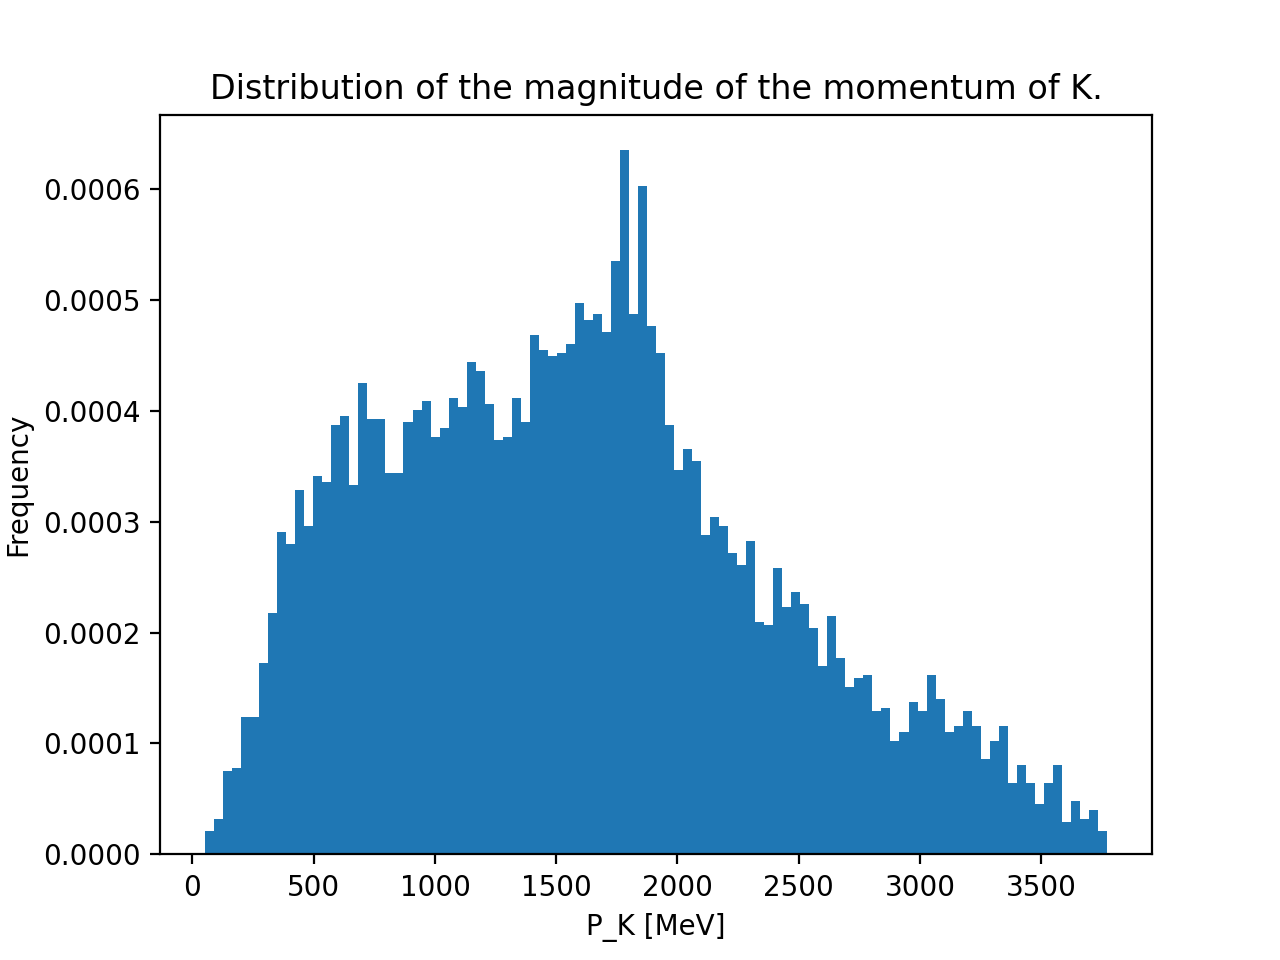

In [106]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.hist(K,100,density = True)
plt.xlabel("P_K [MeV]")
plt.ylabel("Frequency")
plt.title("Distribution of the magnitude of the momentum of K.")
plt.show()

<IPython.core.display.Javascript object>


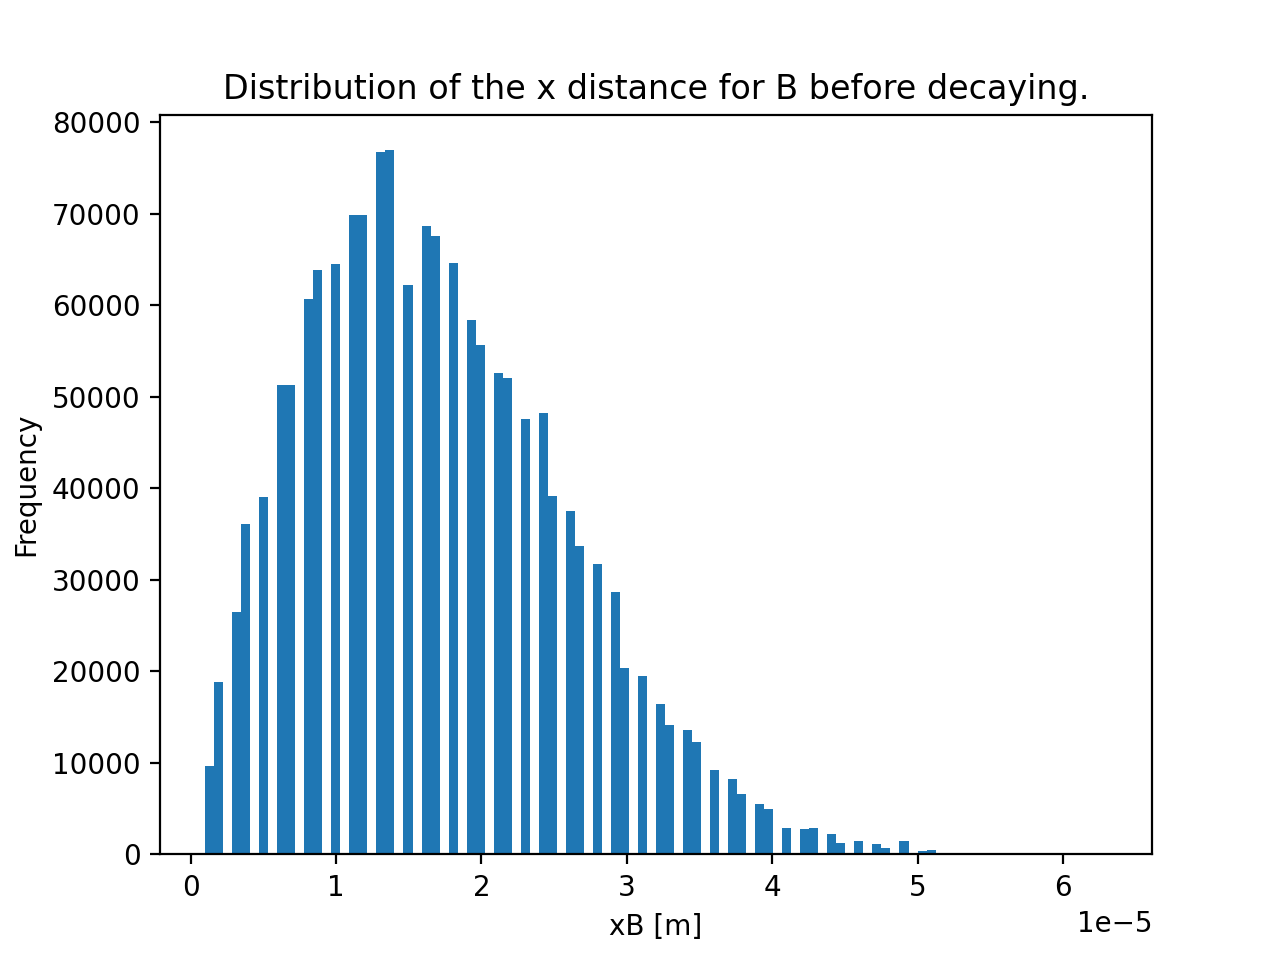

In [108]:
plt.close()
plt.hist(xB,100,density = True)
plt.xlabel("xB [m]")
plt.ylabel("Frequency")
plt.title("Distribution of the x distance for B before decaying.")
plt.show()

<IPython.core.display.Javascript object>


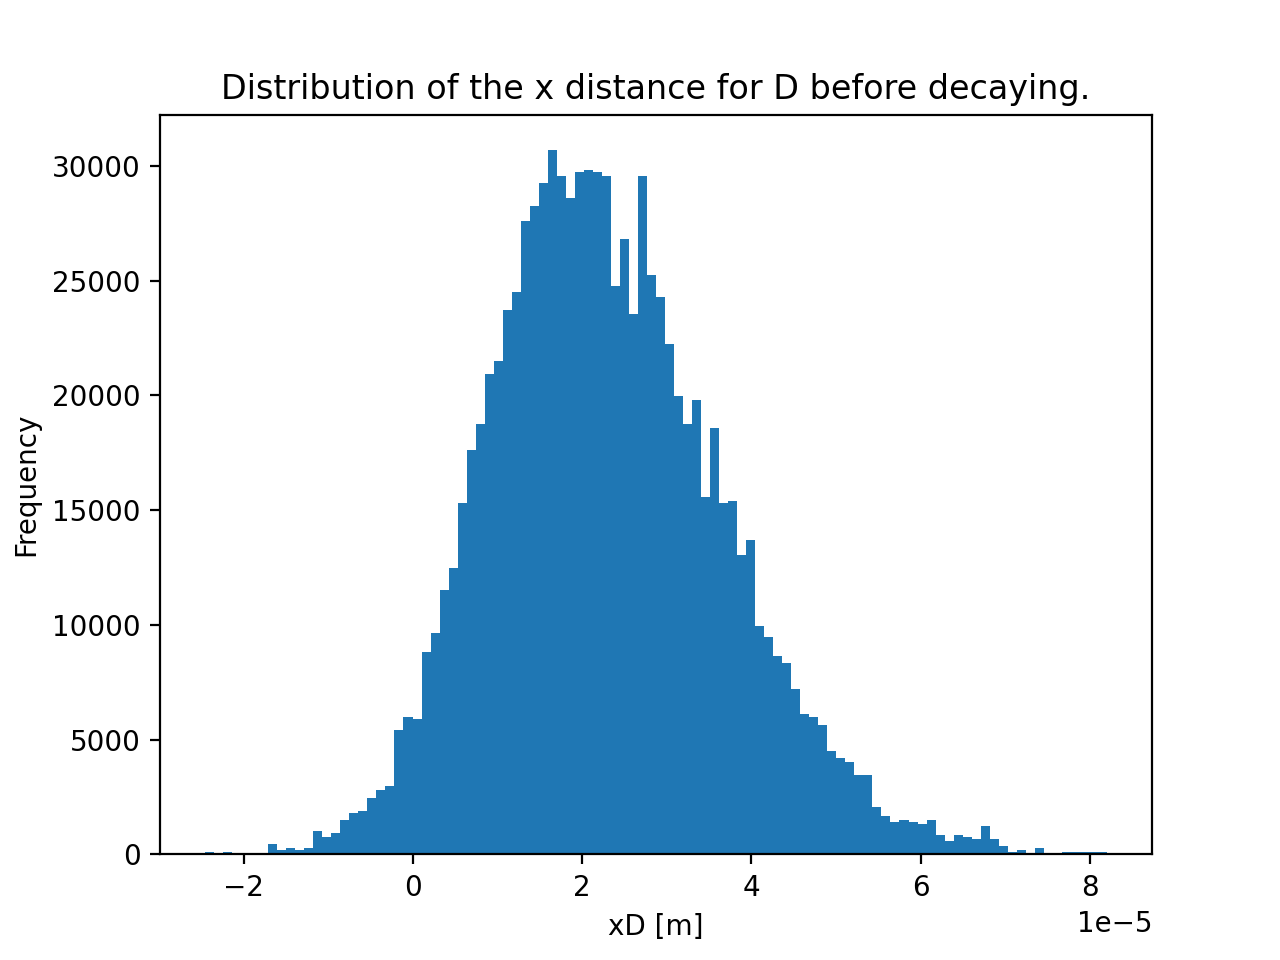

In [109]:
plt.close()
plt.hist(xD,100,density = True)
plt.xlabel("xD [m]")
plt.ylabel("Frequency")
plt.title("Distribution of the x distance for D before decaying.")
plt.show()

<IPython.core.display.Javascript object>


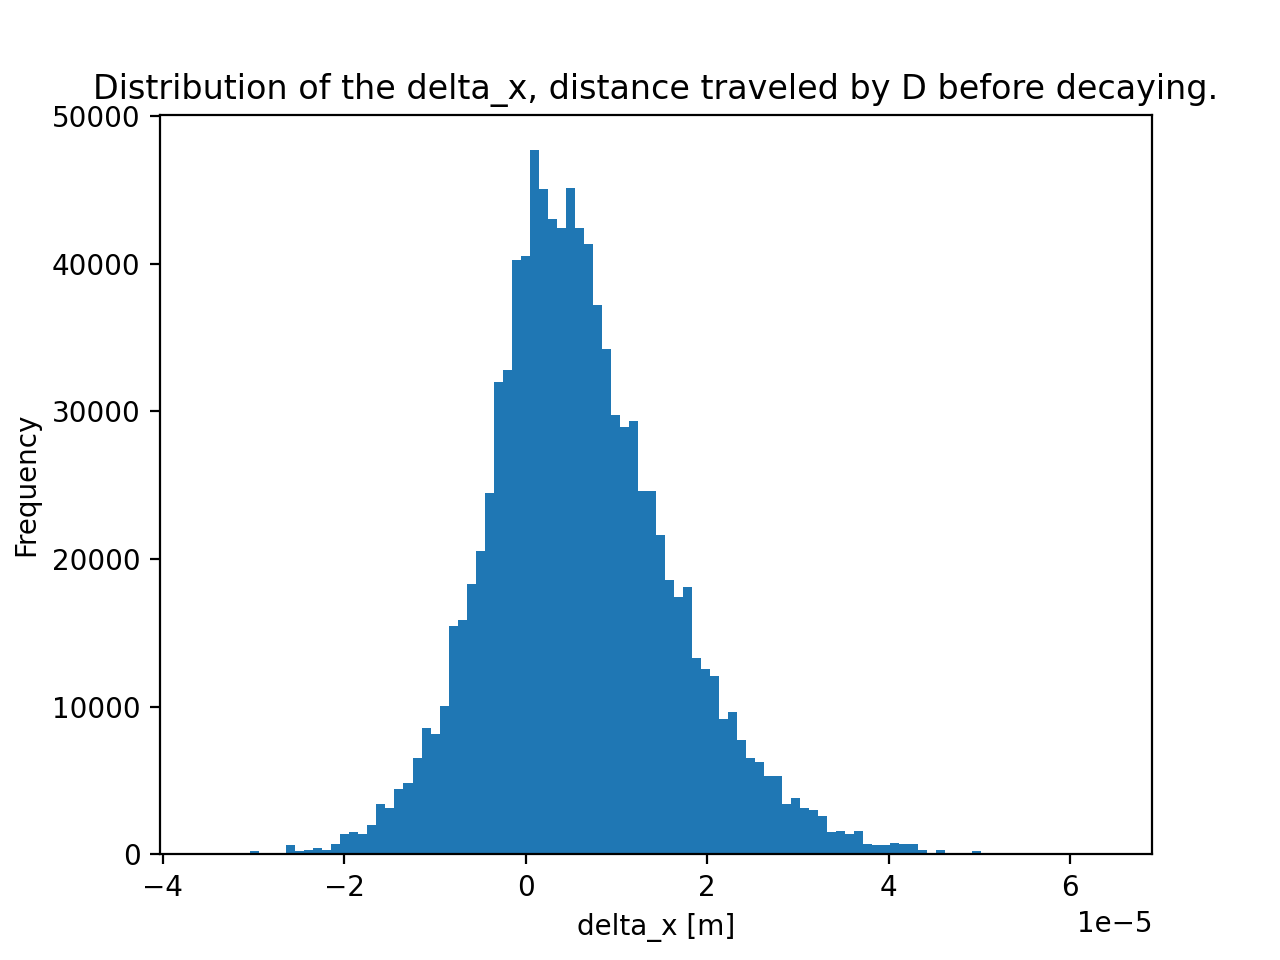

In [110]:
plt.close()
plt.hist(delta_x,100,density = True)
plt.xlabel("delta_x [m]")
plt.ylabel("Frequency")
plt.title("Distribution of the delta_x, distance traveled by D before decaying.")
plt.show()

<IPython.core.display.Javascript object>


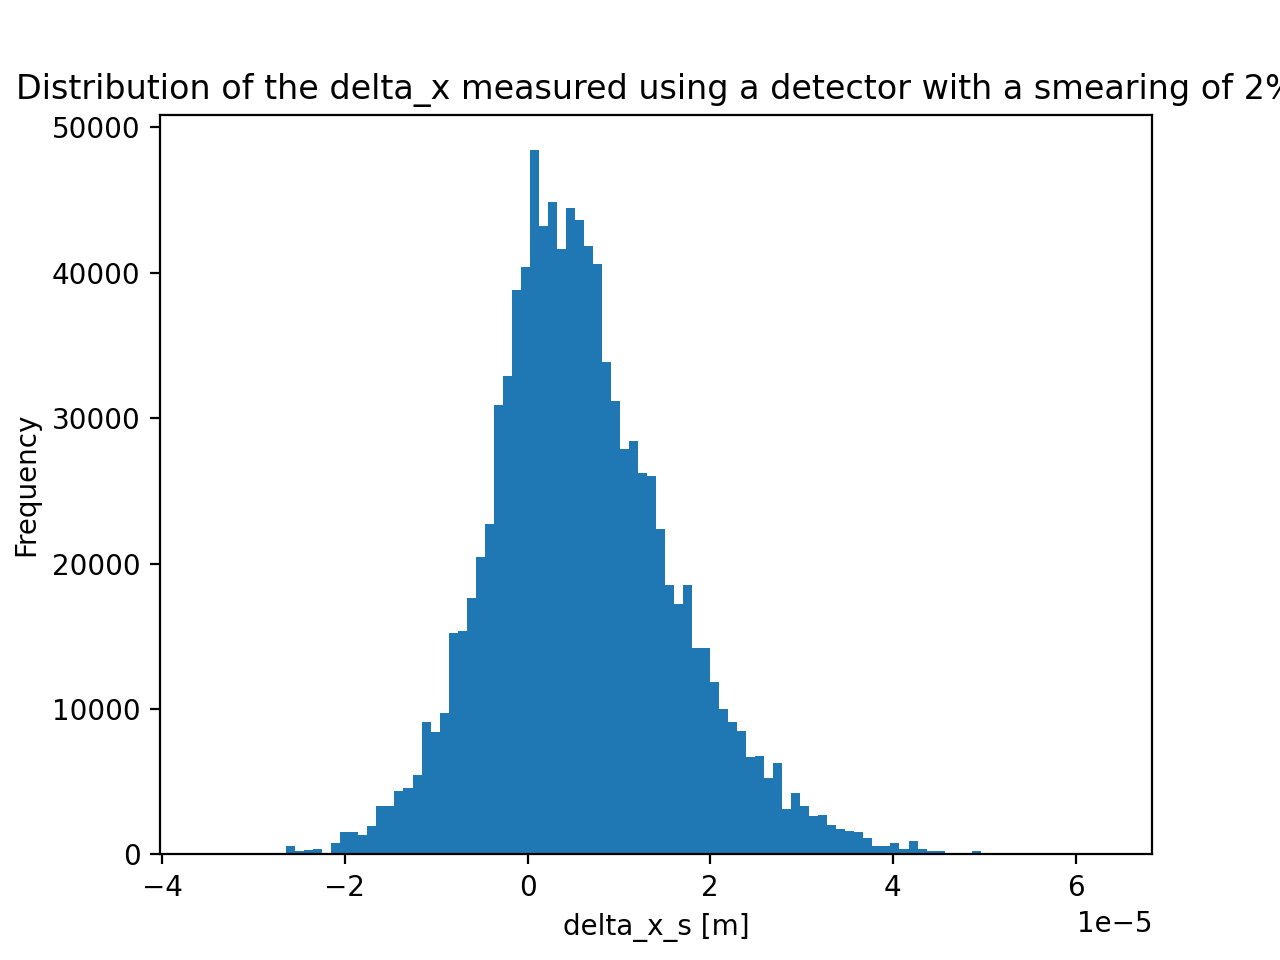

In [111]:
plt.close()
plt.hist(delta_x_s,100,density = True)
plt.xlabel("delta_x_s [m]")
plt.ylabel("Frequency")
plt.title("Distribution of the delta_x measured using a detector with a smearing of 2%")
plt.show()

<IPython.core.display.Javascript object>


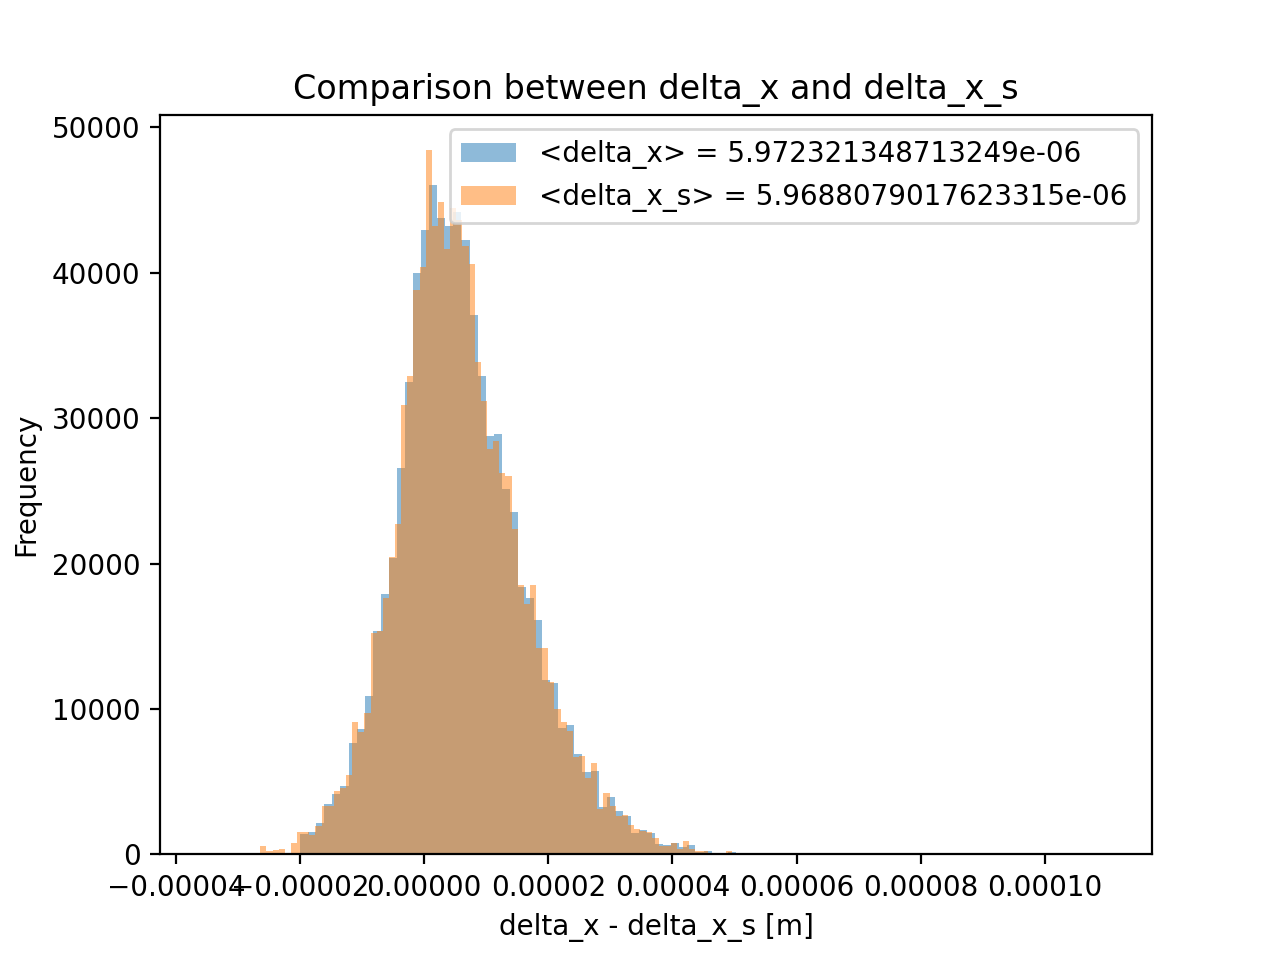

In [112]:
plt.close()
mean_dx = delta_x.mean()
mean_dxs = delta_x_s.mean()
plt.hist(delta_x,100, alpha=0.5,label="<delta_x> = "+str(mean_dx),density=True,range = (-2e-5,11e-5))
plt.hist(delta_x_s,100, alpha=0.5,label="<delta_x_s> = "+str(mean_dxs),density=True)
plt.xlabel("delta_x - delta_x_s [m]")
plt.ylabel("Frequency")
plt.title("Comparison between delta_x and delta_x_s")
plt.legend()
plt.show()